In [1]:
# 라이브러리 임포트
import pandas as pd

In [2]:
# 최근 주택 전국 평균 분양가격
df_last = pd.read_csv('/content/drive/MyDrive/데이터파일/주택도시보증공사_전국 평균 분양가격(2019년 12월).csv',encoding='cp949')
df_last.shape

(4335, 5)

In [3]:
# 미리보기
df_last.head()
df_last.tail()

,지역명,규모구분,연도,월,분양가격(㎡)
4330,제주,전체,2019,12,3882
4331,제주,전용면적 60㎡이하,2019,12,NaN
4332,제주,전용면적 60㎡초과 85㎡이하,2019,12,3898
4333,제주,전용면적 85㎡초과 102㎡이하,2019,12,NaN
4334,제주,전용면적 102㎡초과,2019,12,3601


In [4]:
# 2013년 9월부터 2015년 8월까지 데이터

df_first = pd.read_csv('/content/drive/MyDrive/데이터파일/전국 평균 분양가격(2013년 9월부터 2015년 8월까지).csv',encoding='cp949')
df_first.shape

(17, 22)

In [5]:
# 데이터 미리보기

print(df_first.head())
df_first.tail()

   지역  2013년12월  2014년1월  2014년2월  ...  2015년5월  2015년6월  2015년7월  2015년8월
0  서울     18189    17925    17925  ...    18367    18374    18152    18443
1  부산      8111     8111     9078  ...     9345     9515     9559     9581
2  대구      8080     8080     8077  ...     8568     8542     8542     8795
3  인천     10204    10204    10408  ...    10551    10443    10443    10449
4  광주      6098     7326     7611  ...     7877     7881     8089     8231

[5 rows x 22 columns]


,지역,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,2014년9월,2014년10월,2014년11월,2014년12월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
12,전북,6282,6281,5946,5966,6277,6306,6351,6319,6436,6719,6581,6583,6583,6583,6583,6542,6551,6556,6601,6750,6580
13,전남,5678,5678,5678,5696,5736,5656,5609,5780,5685,5804,5753,5768,5784,5784,5833,5825,5940,6050,6243,6286,6289
14,경북,6168,6168,6234,6317,6412,6409,6554,6556,6563,6577,6778,6881,6989,6992,6953,6997,7006,6966,6887,7035,7037
15,경남,6473,6485,6502,6610,6599,6610,6615,6613,6606,6767,6881,7125,7332,7592,7588,7668,7683,7717,7715,7723,7665
16,제주,7674,7900,7900,7900,7900,7900,7914,7914,7914,7833,7724,7724,7739,7739,7739,7826,7285,7285,7343,7343,7343


In [6]:
# info로 요약정보 확인하기

print(df_last.info())
print(df_first.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4335 entries, 0 to 4334
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   지역명      4335 non-null   object
 1   규모구분     4335 non-null   object
 2   연도       4335 non-null   int64 
 3   월        4335 non-null   int64 
 4   분양가격(㎡)  4058 non-null   object
dtypes: int64(2), object(3)
memory usage: 169.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   지역        17 non-null     object
 1   2013년12월  17 non-null     int64 
 2   2014년1월   17 non-null     int64 
 3   2014년2월   17 non-null     int64 
 4   2014년3월   17 non-null     int64 
 5   2014년4월   17 non-null     int64 
 6   2014년5월   17 non-null     int64 
 7   2014년6월   17 non-null     int64 
 8   2014년7월   17 non-null     int64 
 9   2014년8월   17 non-null     int64 
 10  2014년9월   17 n

In [7]:
# 결측치 확인하기

df_last.isnull().sum()

지역명          0
규모구분         0
연도           0
월            0
분양가격(㎡)    277
dtype: int64

In [8]:
# 데이터 타입 변경하기

df_last["분양가격"] = pd.to_numeric(df_last['분양가격(㎡)'],errors = 'coerce')
df_last["분양가격"].head(1)

0    5841.0
Name: 분양가격, dtype: float64

In [9]:
# 평당 분양가격 구하기
# 2013년의 데이터는 평당분양가격을 기준으로 되어있다. 분양가격을 평당기준으로 보기위해 3.3을 곱해서 "평당분양가격" 컬럼을 만들어 추가하기

df_last["평당분양가격"] = df_last["분양가격"] * 3.3
df_last.head(1)

,지역명,규모구분,연도,월,분양가격(㎡),분양가격,평당분양가격
0,서울,전체,2015,10,5841,5841.0,19275.3


In [10]:
# 분양가격 요약하기

df_last.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4335 entries, 0 to 4334
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   지역명      4335 non-null   object 
 1   규모구분     4335 non-null   object 
 2   연도       4335 non-null   int64  
 3   월        4335 non-null   int64  
 4   분양가격(㎡)  4058 non-null   object 
 5   분양가격     3957 non-null   float64
 6   평당분양가격   3957 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 237.2+ KB


In [11]:
# 수치데이터로 변경된 분양가격컬럼 요약하기

df_last["분양가격"].describe()

count     3957.000000
mean      3238.128633
std       1264.309933
min       1868.000000
25%       2441.000000
50%       2874.000000
75%       3561.000000
max      12728.000000
Name: 분양가격, dtype: float64

In [12]:
# 규모구분을 전용면적 컬럼으로 변경하기
# 규모구분 컬럼은 전용면적에 대한 내용이 있습니다. 전용면적이라는 문구가 공통적으로 들어가고 규모구분보다는 전용면적이 좀 더 직관적이기 때문에 전용면적이라는 컬럼을 새로 만들어주고 기존 규모구분의 값에서 전용면적, 초과, 이하 등의 문구를 빼고 간결하게 만들어 봅니다.
# 이 때 str 의 replace 기능을 사용해서 예를들면 "전용면적 60㎡초과 85㎡이하"라면 "60㎡~85㎡" 로 변경해 줍니다.

df_last["규모구분"].unique()

array(['전체', '전용면적 60㎡이하', '전용면적 60㎡초과 85㎡이하', '전용면적 85㎡초과 102㎡이하',
       '전용면적 102㎡초과'], dtype=object)

In [13]:
df_last["전용면적"] = df_last["규모구분"].str.replace("전용면적", "")
df_last["전용면적"] = df_last["전용면적"].str.replace("초과", "~")
df_last["전용면적"] = df_last["전용면적"].str.replace("이하", "")
df_last["전용면적"] = df_last["전용면적"].str.replace(" ","").str.strip()
df_last["전용면적"]

0             전체
1            60㎡
2        60㎡~85㎡
3       85㎡~102㎡
4          102㎡~
          ...   
4330          전체
4331         60㎡
4332     60㎡~85㎡
4333    85㎡~102㎡
4334       102㎡~
Name: 전용면적, Length: 4335, dtype: object

In [14]:
# 필요없는 컬럼 제거하기
# drop을 통해 전처리 해준 컬럼을 제거합니다. pandas의 데이터프레임과 관련된 메소드에는 axis 옵션이 필요할 때가 있는데 행과 열중 어떤 기준으로 처리를 할 것인지를 의미합니다. 보통 기본적으로 0으로 되어 있고 행을 기준으로 처리함을 의미합니다. 메모리 사용량이 줄어들었는지 확인합니다.
df_last.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4335 entries, 0 to 4334
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   지역명      4335 non-null   object 
 1   규모구분     4335 non-null   object 
 2   연도       4335 non-null   int64  
 3   월        4335 non-null   int64  
 4   분양가격(㎡)  4058 non-null   object 
 5   분양가격     3957 non-null   float64
 6   평당분양가격   3957 non-null   float64
 7   전용면적     4335 non-null   object 
dtypes: float64(2), int64(2), object(4)
memory usage: 271.1+ KB


In [15]:
# drop 사용시 axis에 유의하자.
# axis 0 : 행, 1 : 열
df_last = df_last.drop(["규모구분", "분양가격(㎡)"], axis=1)
df_last.head(1)

,지역명,연도,월,분양가격,평당분양가격,전용면적
0,서울,2015,10,5841.0,19275.3,전체


In [16]:
# 컬럼 제거를 통해 메모리 사용량이 줄었는가? 확인해보기

df_last.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4335 entries, 0 to 4334
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   지역명     4335 non-null   object 
 1   연도      4335 non-null   int64  
 2   월       4335 non-null   int64  
 3   분양가격    3957 non-null   float64
 4   평당분양가격  3957 non-null   float64
 5   전용면적    4335 non-null   object 
dtypes: float64(2), int64(2), object(2)
memory usage: 203.3+ KB


In [17]:
# gropby로 데이터 집계하기
# gropby를 통해 데이터를 그룹화해서 연산을 해보자.
# 지역명으로 분양가격의 평균을 구하고 막대그래프(bar)로 시각화 합니다.
# df.groupby(["인덱스로 사용할 컬럼명"])["계산할 컬럼 값"].연산()

df_last.groupby(["지역명"])["평당분양가격"].mean()

지역명
강원     7890.750000
경기    13356.895200
경남     9268.778138
경북     8376.536515
광주     9951.535821
대구    11980.895455
대전    10253.333333
부산    12087.121200
서울    23599.976400
세종     9796.516456
울산    10014.902013
인천    11915.320732
전남     7565.316532
전북     7724.235484
제주    11241.276712
충남     8233.651883
충북     7634.655600
Name: 평당분양가격, dtype: float64

In [18]:
# 지역명, 전용면적으로 평당분양가격의 평균을 구하자.
# unstack()을 사용하면 group으로 묶여진 데이터를 matrix 형태로 전환해줍니다.
# ? : groupby할때 전용면적, 지역명 순서를 바꾸면 결과가 다르게 나올까?
df_last.groupby(["전용면적", "지역명"])["평당분양가격"].mean().unstack()

지역명,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
전용면적,,,,,,,,,,,,,,,,,
102㎡~,8311.380000,14771.790,10358.363265,9157.302000,11041.532432,13087.338000,14876.871429,13208.250,23446.038,10106.976000,9974.448000,14362.030435,8168.4900,8193.57000,10522.787234,8689.169388,8195.352
60㎡,7567.098000,13251.744,8689.175000,7883.172000,9430.666667,11992.068000,9176.475000,11353.782,23212.794,9323.927027,9202.106897,11241.318000,7210.1700,7609.93200,14022.221053,7911.156000,7103.118
60㎡~85㎡,7485.588000,12523.566,8618.676000,8061.372000,9910.692000,11778.690000,9711.372000,11864.820,22786.830,9775.458000,10502.531707,11384.406000,7269.2400,7271.35200,10621.314000,7818.954000,7264.488
85㎡~102㎡,8749.557143,13677.774,10017.612000,8773.814634,9296.100000,11140.642857,9037.430769,12072.588,25943.874,9847.926000,8861.007692,11527.560000,7908.8625,8275.78125,10709.082353,9120.045000,8391.306
전체,7477.536000,12559.602,8658.672000,8078.532000,9903.630000,11771.298000,9786.018000,11936.166,22610.346,9805.422000,10492.712195,11257.026000,7283.5620,7292.60400,10784.994000,7815.324000,7219.014


In [19]:
# 연도, 지역명으로 평당분양가격의 평균을 구합니다.

df_last.groupby(["연도", "지역명"])["평당분양가격"].mean().unstack()

지역명,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
연도,,,,,,,,,,,,,,,,,
2015,7188.060000,11060.94,8459.220000,7464.160000,7916.700000,9018.900000,8190.600000,10377.400,20315.680,8765.020000,9367.600000,10976.020000,6798.880000,7110.400000,7951.075000,7689.880000,6828.800
2016,7162.903846,11684.97,8496.730000,7753.405000,9190.683333,10282.030000,8910.733333,10743.535,21753.435,8857.805000,9582.574138,11099.055000,6936.600000,6906.625000,9567.480000,7958.225000,7133.335
2017,7273.560000,12304.98,8786.760000,8280.800000,9613.977551,12206.700000,9957.158491,11560.680,21831.060,9132.505556,10666.935714,11640.600000,7372.920000,7398.973585,12566.730000,8198.422222,7473.120
2018,8219.255000,14258.42,9327.670000,8680.776923,9526.953333,12139.252632,10234.106667,12889.965,23202.245,10340.463158,10241.400000,11881.532143,7929.845000,8174.595000,11935.968000,8201.820000,8149.295
2019,8934.475000,15665.54,10697.615789,9050.250000,12111.675000,14081.650000,12619.200000,13537.865,28286.830,11299.394118,10216.250000,13249.775000,8219.275862,8532.260000,11828.469231,8748.840000,7970.875


In [20]:
# 최근 데이터 시각화하기

# 데이터시각화를 위한 폰트설정
import matplotlib
import matplotlib.font_manager as fm
fm.get_fontconfig_fonts()
# font_location = 'content/drive/My Drive'
font_location = '/content/drive/My Drive/파이썬/NanumGothic.ttf'
font_name = fm.FontProperties(fname=font_location).get_name()
matplotlib.rc('font', family=font_name)

%matplotlib inline


import matplotlib as mpl

import matplotlib.pyplot as plt

 

%config InlineBackend.figure_format = 'retina'

 

!apt -qq -y install fonts-nanum

 

import matplotlib.font_manager as fm

fontpath = '/content/drive/My Drive/NanumGothic.ttf'

font = fm.FontProperties(fname=fontpath, size=9)

plt.rc('font', family='NanumBarunGothic') 

mpl.font_manager._rebuild()

fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 14 not upgraded.


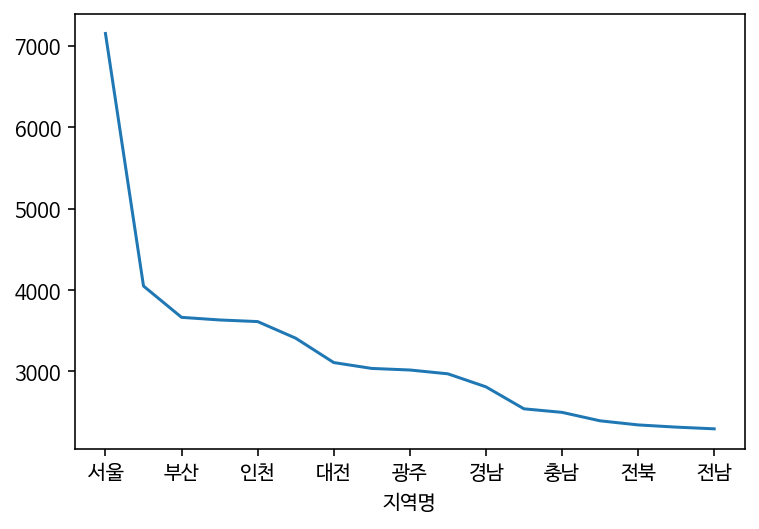

In [21]:
# Pandas로 시각화하기 - 선그래프와 막대그래프
# Pandas의 plot을 활용하면 다양한 그래프를 그릴 수 있다. seaborn을 사용했을 때보다 pandas를 사용해서 시각화를 할 때의 장점은 미리 계산을 하고 그리기 때문에 속도가 좀 더 빠르다.
# 지역명으로 분양가격의 평균을 구하고 선그래프로 시각화해보기

g = df_last.groupby(["지역명"])["분양가격"].mean().sort_values(ascending=False)
g.plot()

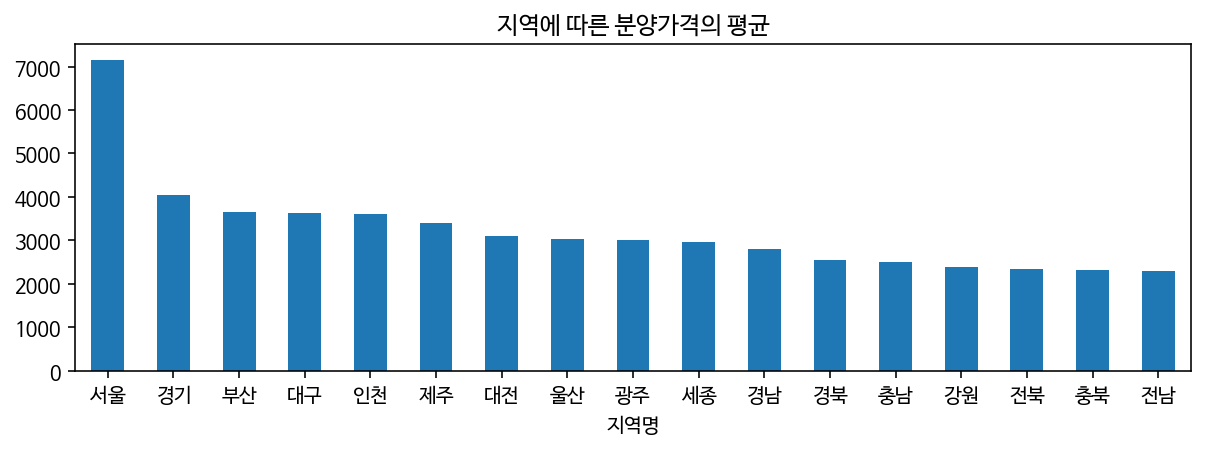

In [39]:
# 지역명으로 분양가격의 평균을 구하고 막대그래프(bar)로 시각화해보기

plot2 = df_last.groupby(["지역명"])["분양가격"].mean().sort_values(ascending=False)
plot2.plot.bar(rot=0, figsize=(10,3),title="지역에 따른 분양가격의 평균")

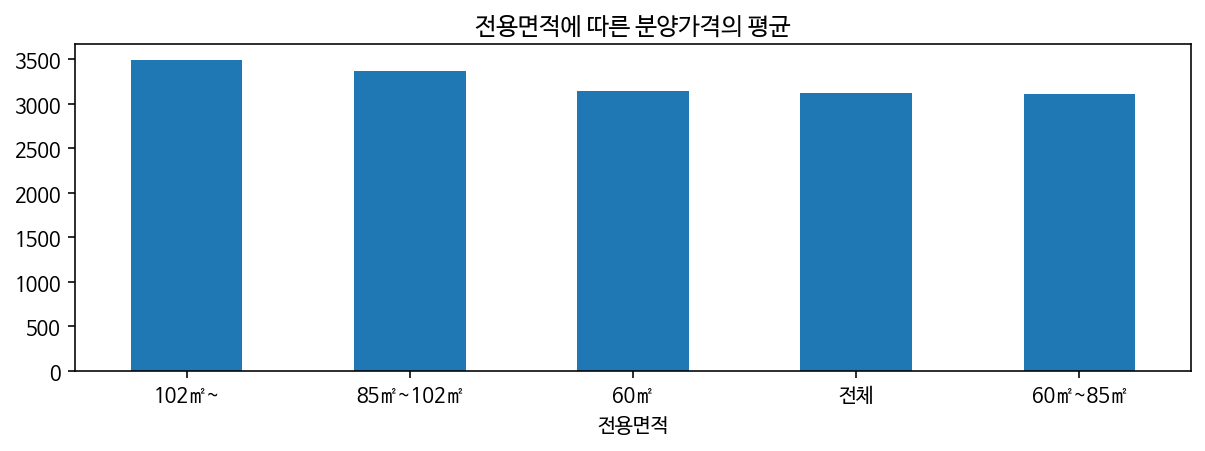

In [37]:
# 전용면적으로 분양가격의 평균을 구하고 막대그래프를 그려보자.
plot3 =df_last.groupby(["전용면적"])["분양가격"].mean().sort_values(ascending=False)
plot3.plot.bar(rot=0, figsize=(10,3),title="전용면적에 따른 분양가격의 평균")

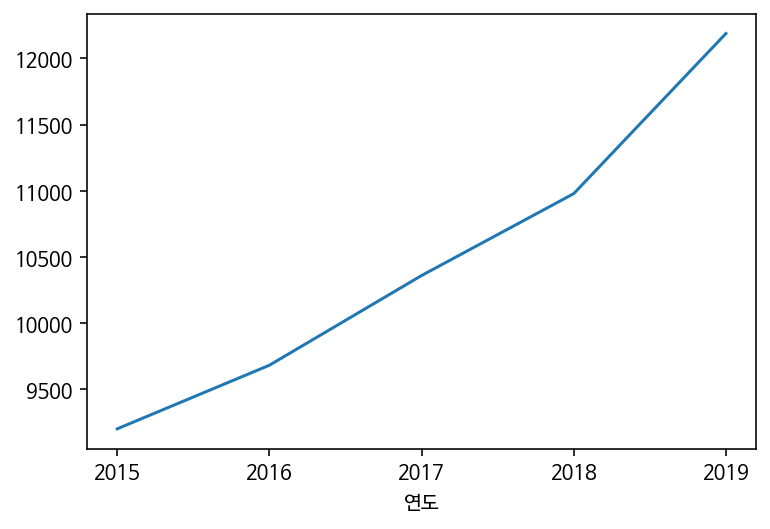

In [40]:
# 연도별 분양가격의 평균을 구하고 막대그래프(bar)로 시각화 합니다.
# 연도에 소숫점이 생기지 않게 표시하고자 한다면 ax.xaxis.set_major_locator를 사용해서 integer로 설정합니다.
from matplotlib.ticker import MaxNLocator
ax = plt.figure().gca()
df_last.groupby(["연도"])["평당분양가격"].mean().plot()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

# box-and-whisker plot | diagram
##https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html
###https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.boxplot.html

* 상자 수염 그림 - 위키백과, 우리 모두의 백과사전

* 가공하지 않은 자료 그대로를 이용하여 그린 것이 아니라, 자료로부터 얻어낸 통계량인 5가지 요약 수치로 그린다.
* 5가지 요약 수치란 기술통계학에서 자료의 정보를 알려주는 아래의 다섯 가지 수치를 의미한다.
* 최솟값
* 제 1사분위수
* 제 2사분위수( ), 즉 중앙값
* 제 3 사분위 수( )
* 최댓값
#Box plot 이해하기 :
##박스 플롯에 대하여 :: -[|]- Box and Whisker
###Understanding Boxplots – Towards Data Science

In [45]:
df_last.pivot_table(index="월", columns="연도", values="평당분양가격")

연도,2015,2016,2017,2018,2019
월,,,,,
1,NaN,9334.029630,10095.132143,10719.148000,11535.540789
2,NaN,9361.440000,10110.885714,10766.668000,11574.793421
3,NaN,9423.276923,10107.428571,10905.488000,11610.094737
4,NaN,9601.993902,10217.232143,10920.728571,11777.876000
5,NaN,9602.396341,10358.819277,11087.485714,11976.394737
6,NaN,9676.042683,10431.618072,10921.928571,12401.884000
7,NaN,9700.551220,10549.536585,10868.376316,12424.852000
8,NaN,9719.023171,10564.869512,10811.147368,12523.896000
9,NaN,9737.656098,10583.601266,10915.257692,12527.571429


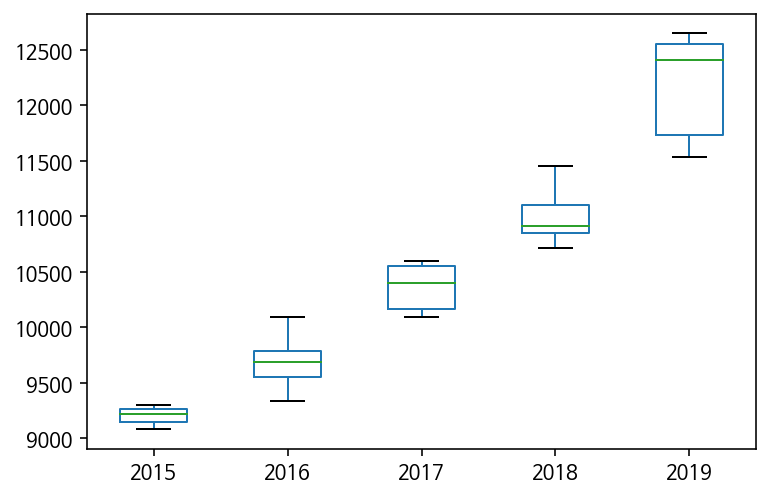

In [46]:
df_last.pivot_table(index="월", columns="연도", values="평당분양가격").plot.box()

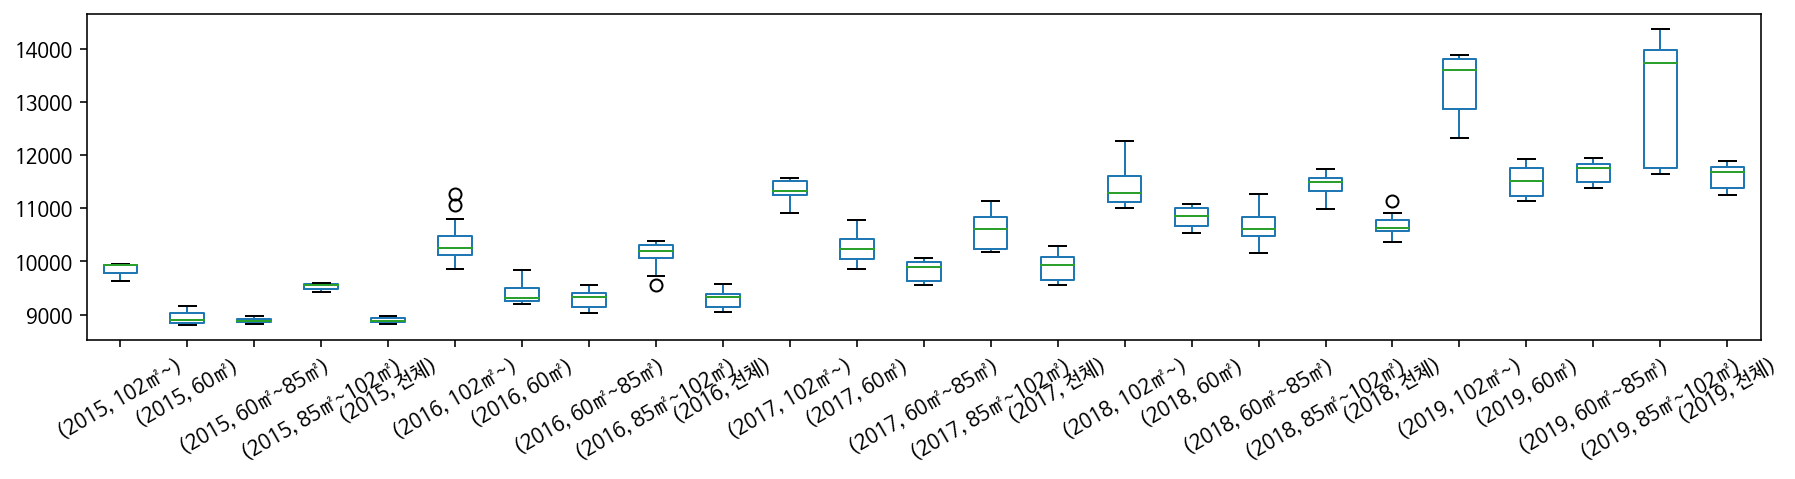

In [48]:
p = df_last.pivot_table(index="월", columns=["연도", "전용면적"], values="평당분양가격")
p.plot.box(figsize=(15, 3), rot=30)

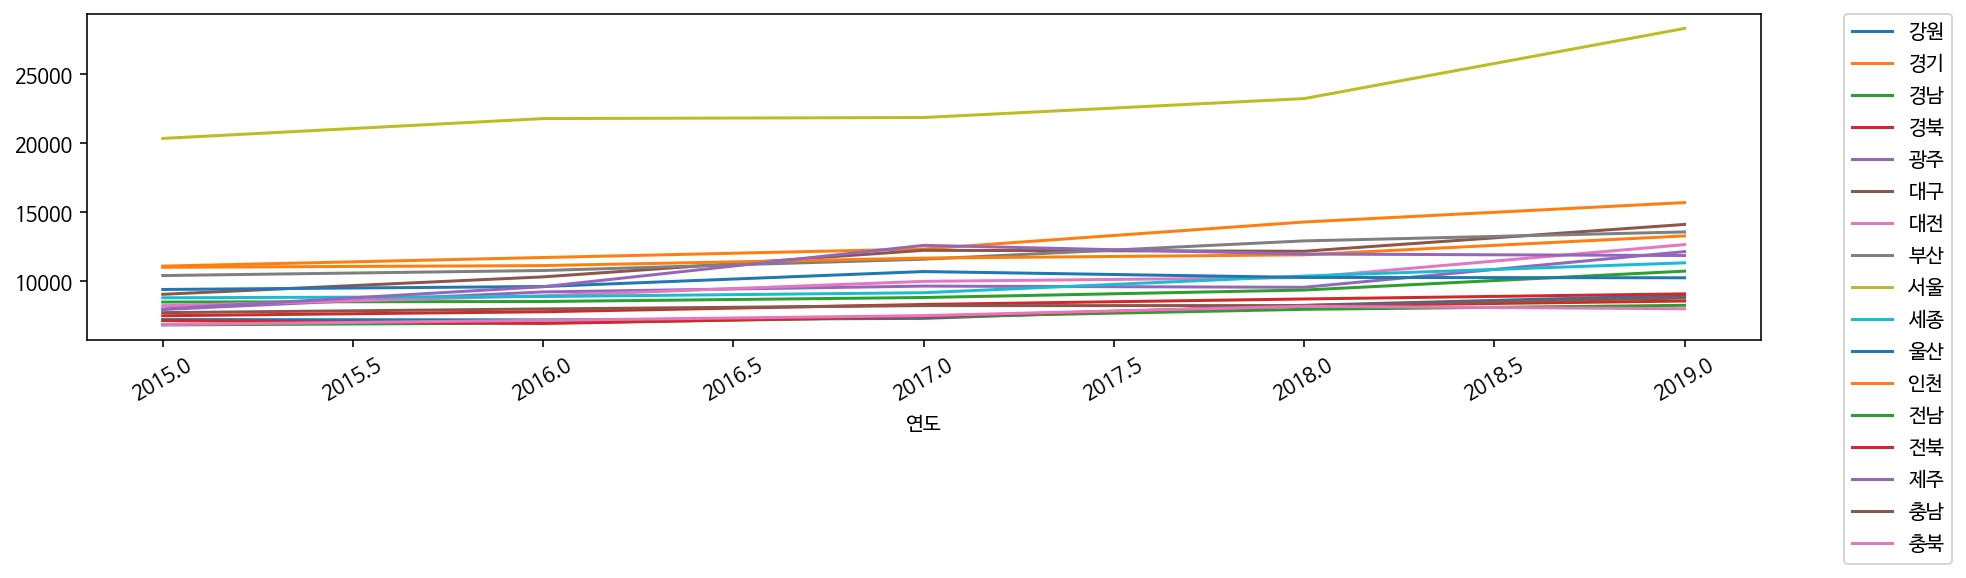

In [49]:
p = df_last.pivot_table(index="연도", columns="지역명", values="평당분양가격")
p.plot(figsize=(15, 3), rot=30)
# 그래프의 밖에 legend 표시하도록 설정
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [51]:
# Seaborn으로 시각화해보기
import seaborn as sns

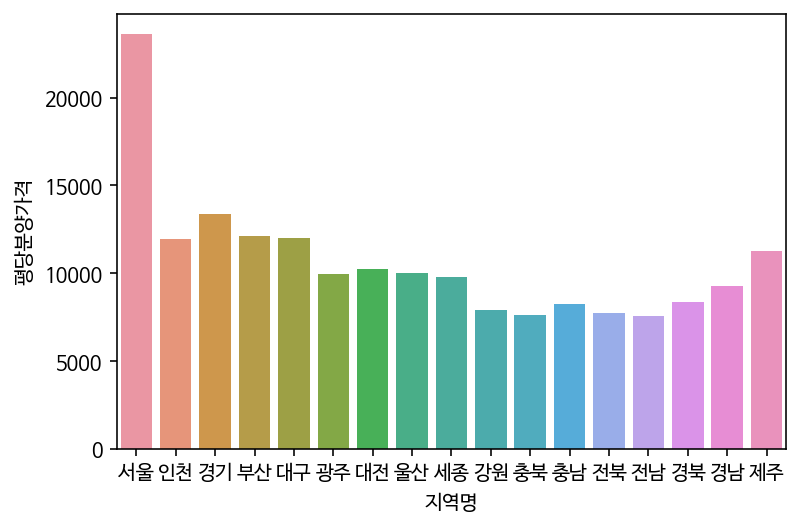

In [52]:
# barplot으로 지역별 평당분양가격을 그려보기
sns.barplot(data=df_last, x="지역명", y="평당분양가격", ci=None)

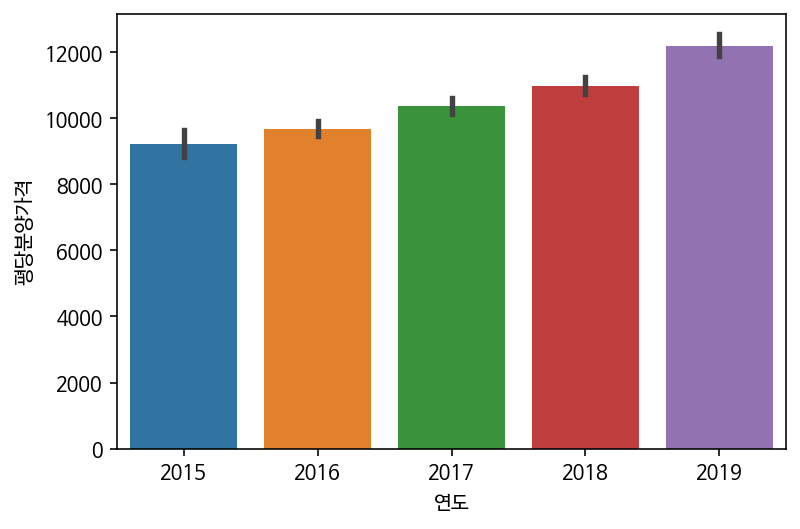

In [55]:
# barplot으로 연도별 평당분양가격 그려보기.

sns.barplot(data=df_last, x="연도", y="평당분양가격")

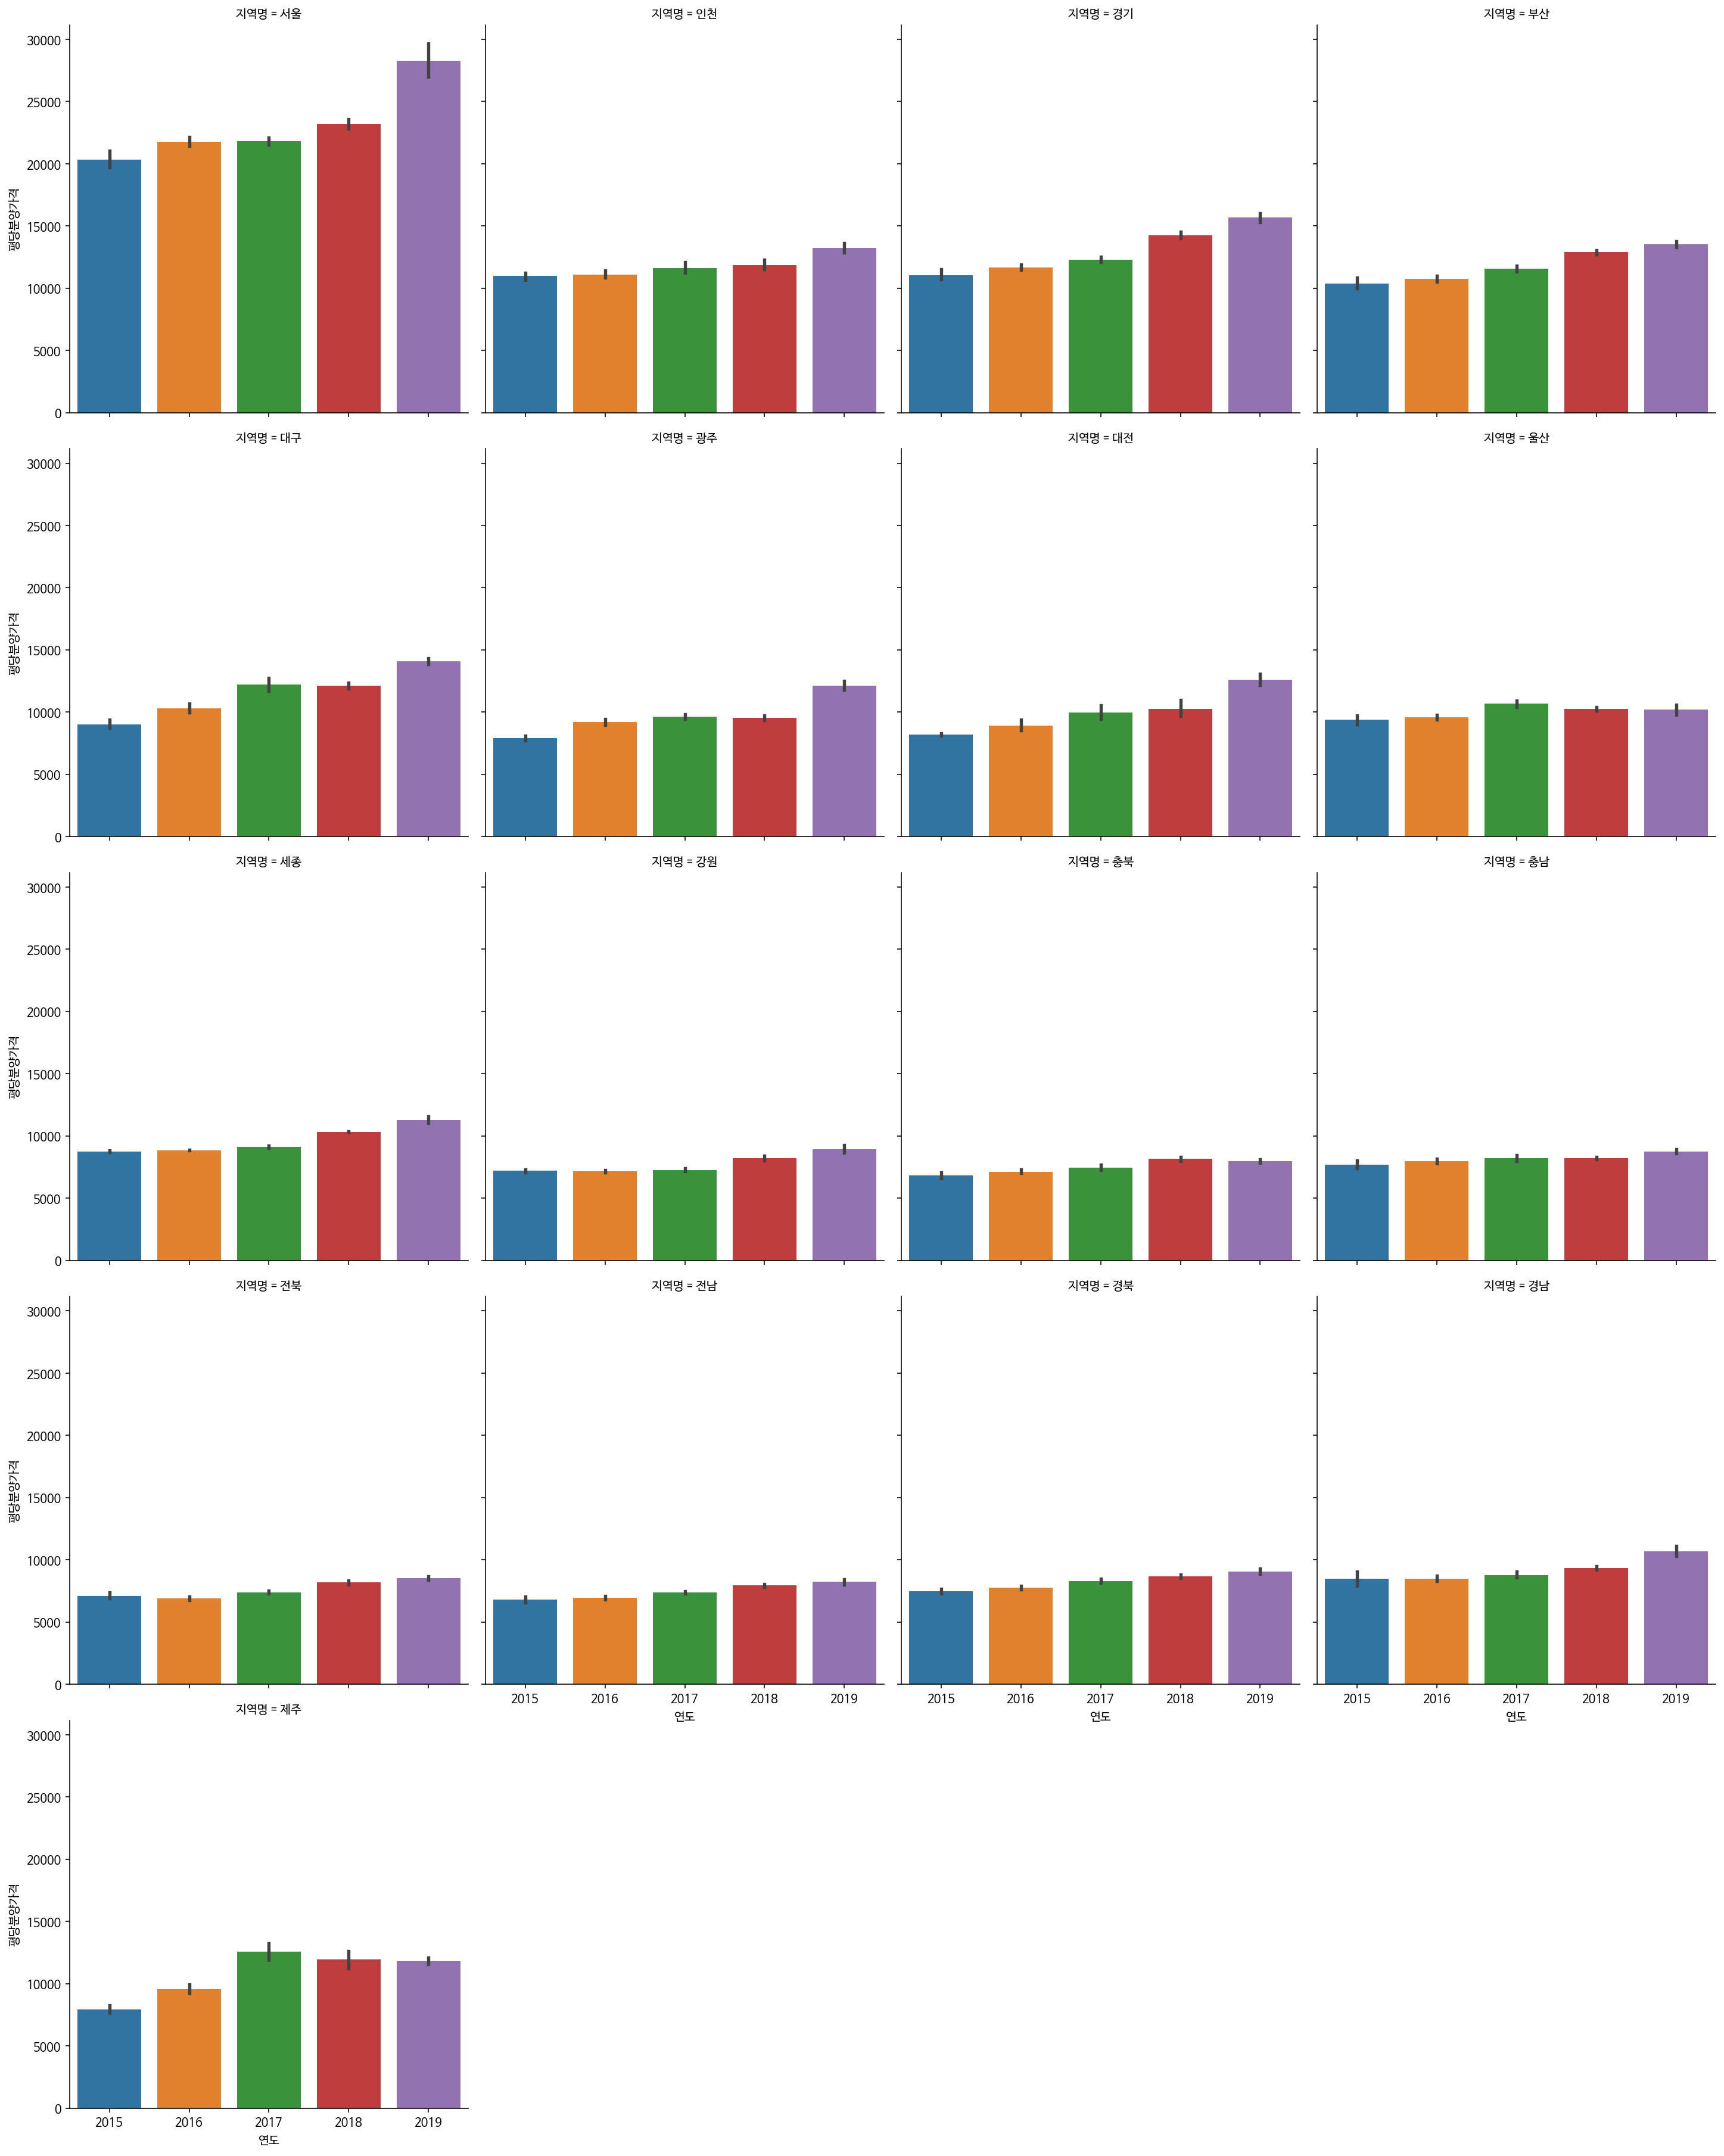

In [56]:
sns.catplot(data=df_last, x="연도", y="평당분양가격", kind="bar", col="지역명", col_wrap=4)

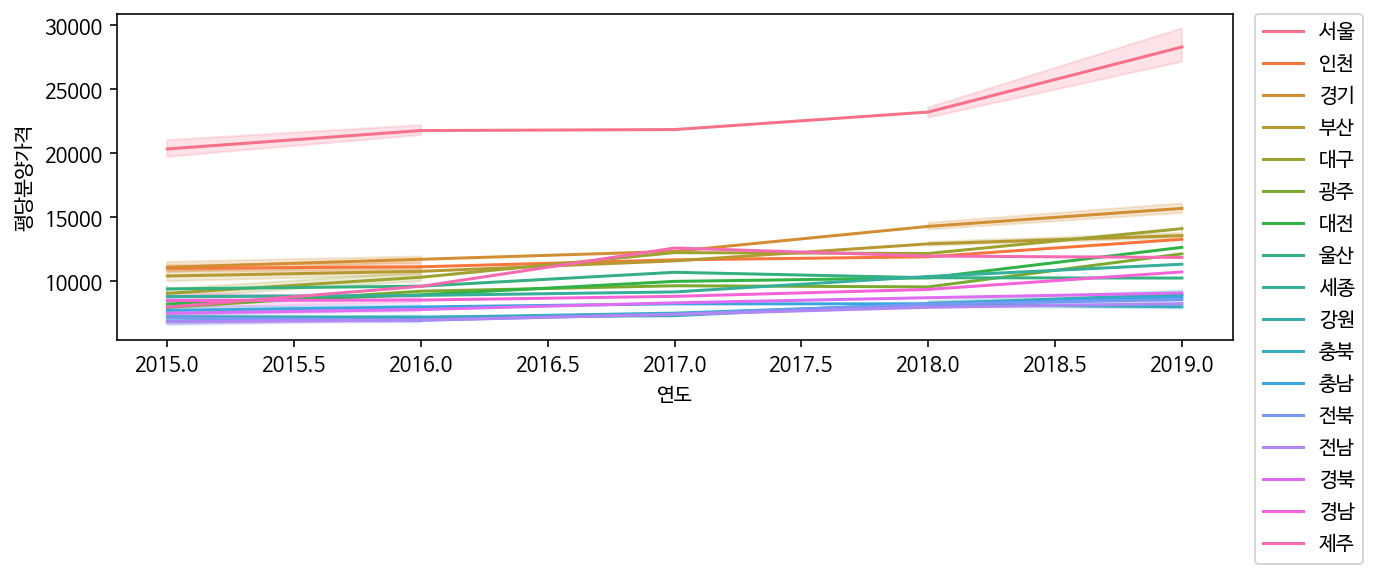

In [60]:
# lineplot으로 연도별 평당분양가격을 그려보기.
# hue 옵션을 이용하여 지역별로 다르게 표시하기.
plt.figure(figsize=(10,3))
sns.lineplot(data=df_last, x="연도", y="평당분양가격", hue="지역명")
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

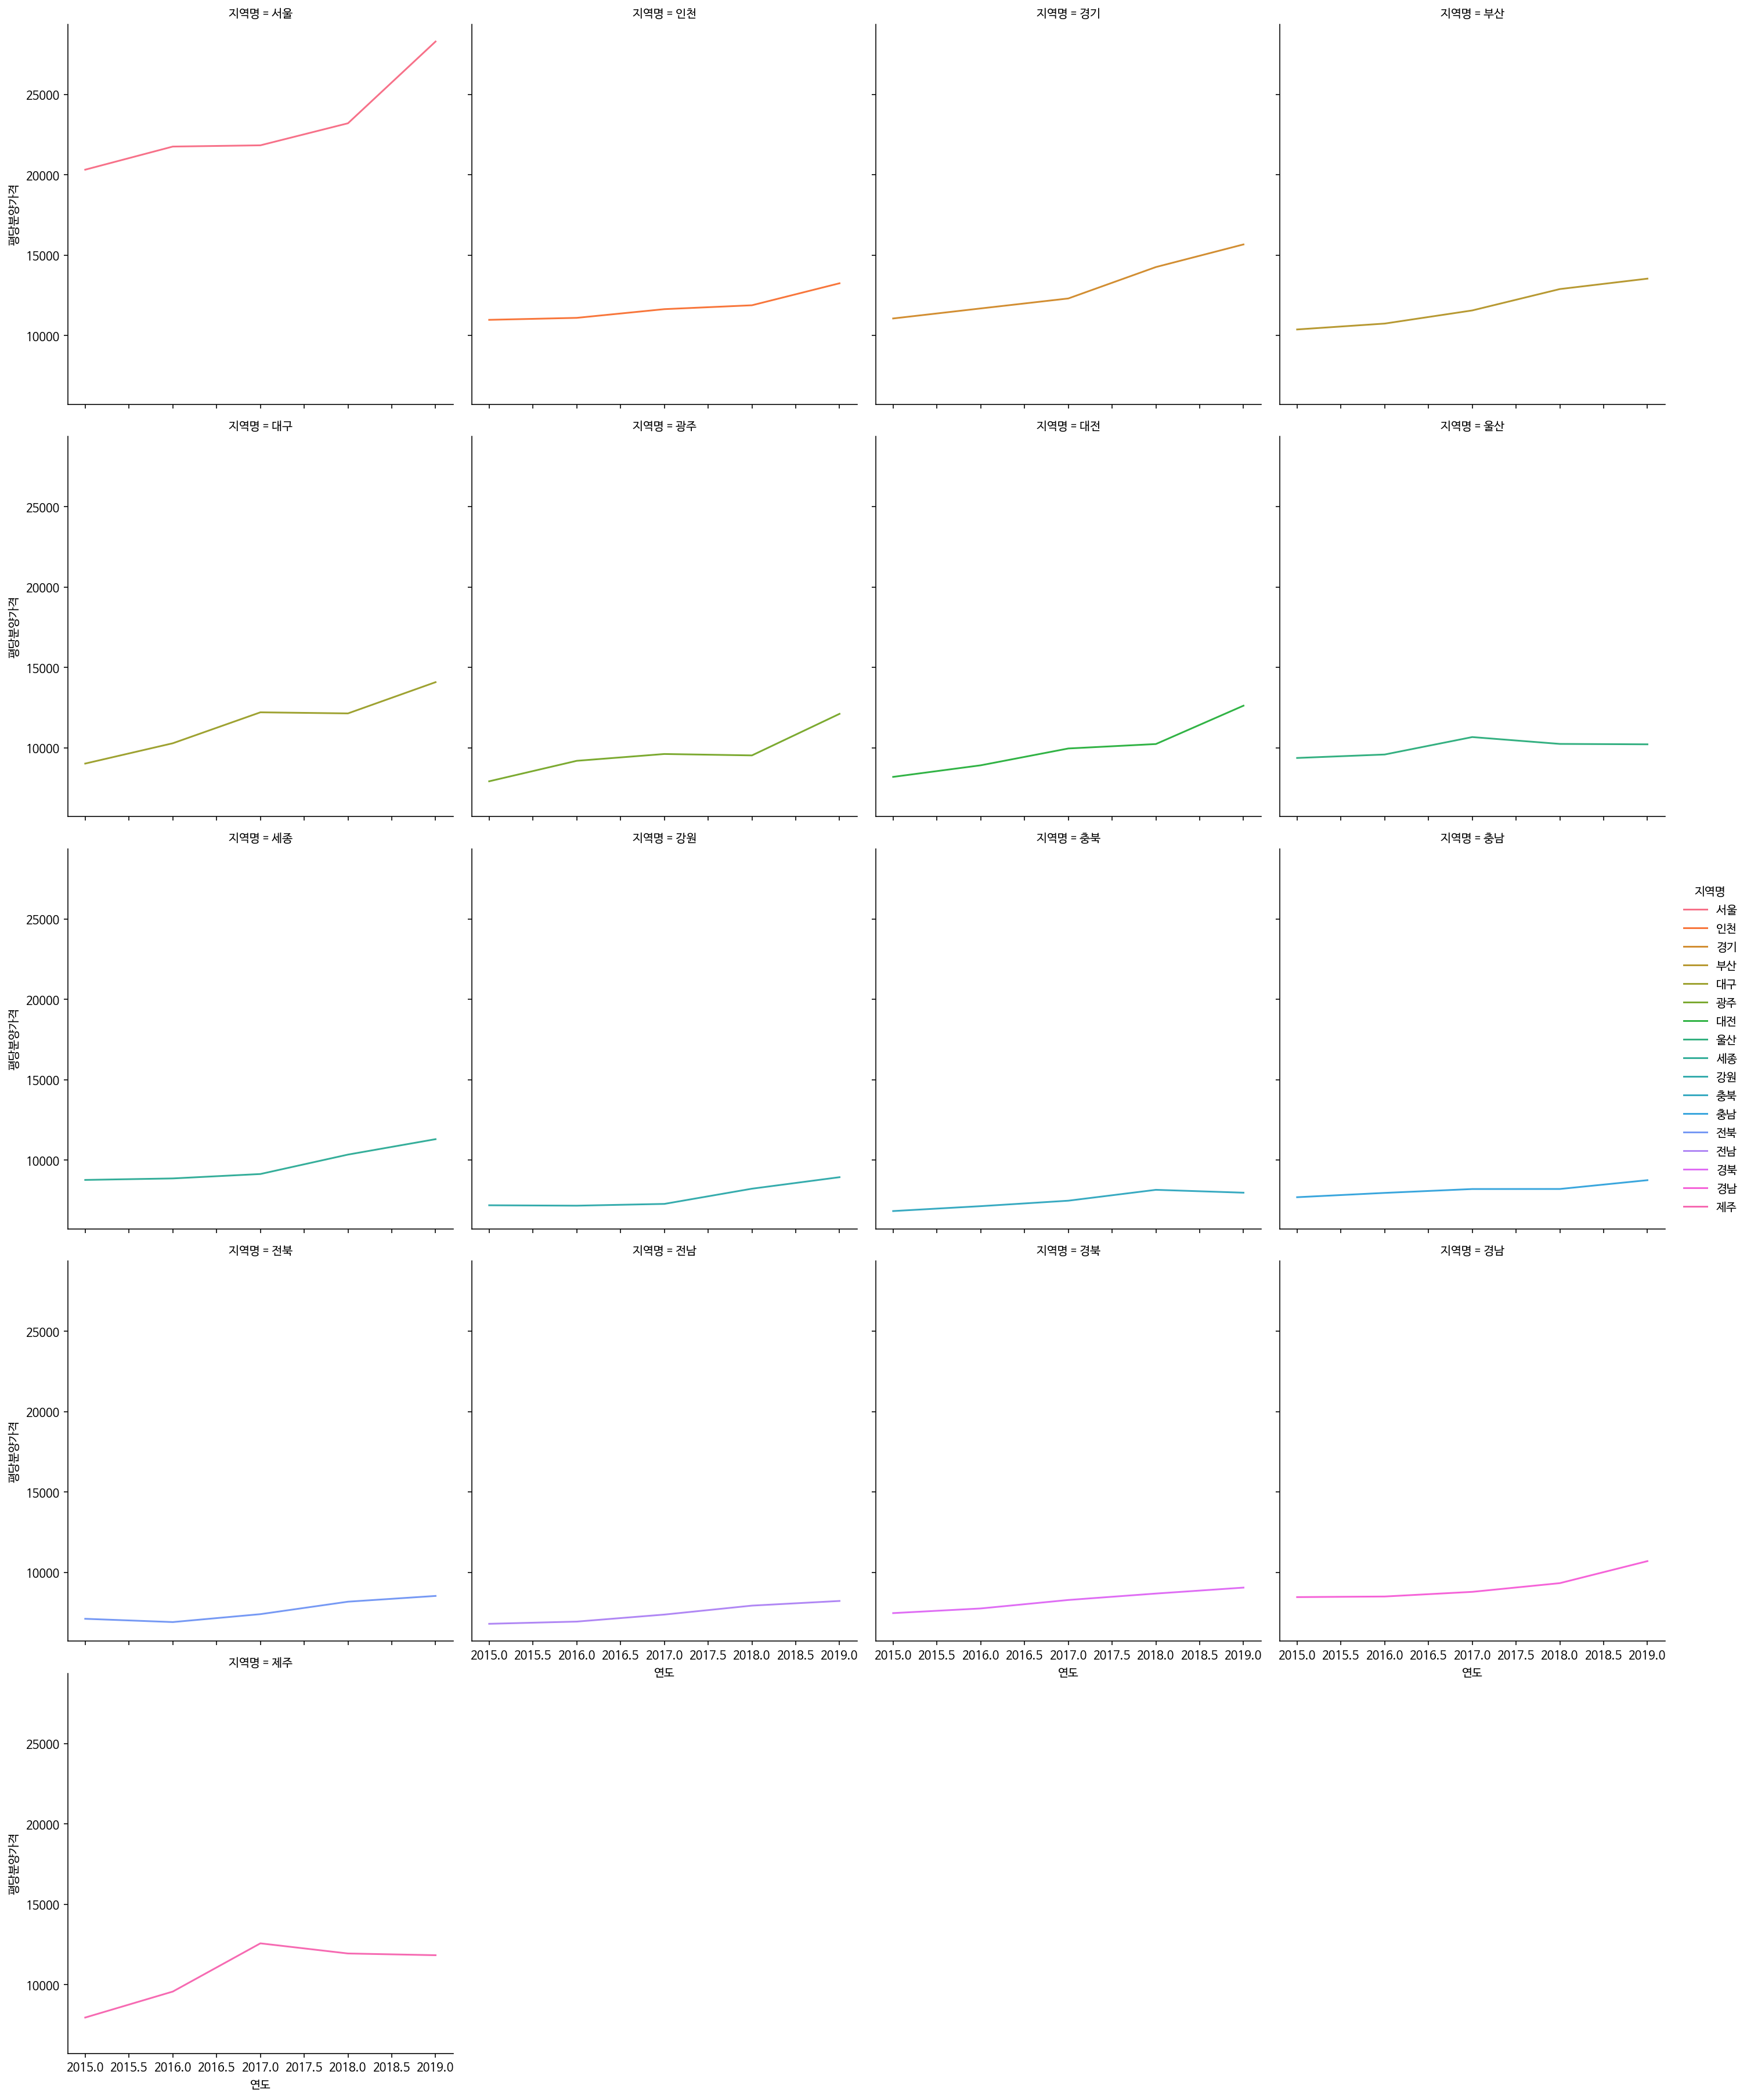

In [61]:
sns.relplot(data=df_last, x="연도", y="평당분양가격", 
            hue="지역명", kind="line", col="지역명", col_wrap=4, ci=None)